In [1]:
# 🔧 Step 1: Required libralibrarieslibralibrariesrieslibralibrariesriesries install (Run only once)
!pip install transformers nltk --quiet  # transformers = model, nltk = text processing

In [2]:
# 🔧 Step 2: Import necessary Python libraries
import pandas as pd                      # CSV file read & dataframe manage
import re                                # Regular expression for text cleaning
from nltk.corpus import stopwords        # English stopword list (like: 'the', 'is', etc)
from nltk.tokenize import word_tokenize  # Word-by-word split for filtering
from nltk import download                # To download NLTK resources
from transformers import pipeline        # HuggingFace summarizer model
import nltk                              # Core nltk library

# ✅ Download only needed NLTK data
nltk.download('punkt')                   # For tokenization
nltk.download('stopwords')               # For removing common English words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# 🔧 Step 3: NLTK resources download (Only once)
download('punkt')            # Word & sentence tokenizers
download('stopwords')        # Common English stopwords



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# 📂 Step 4: Load your dataset
df = pd.read_csv("/content/Last_Year_Project - Main (1).csv")  # Tumi jei file upload koro, tar path eta

In [5]:
# 🧹 Step 5: Company Overview column theke missing gula remove koro
df = df.dropna(subset=["Company Overview"])  # Jekhane review nai, oigula bad

In [6]:
# 🧼 Step 6: Text ke lowercase kora & punctuation clean kora
df["Clean_Review"] = df["Company Overview"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x).lower()))
# 🔹 Explanation:
# - x.lower(): sob kichu small letter e
# - re.sub(): special character gula (.,!@) remove kora


In [7]:
# 🚫 Step 7: Stopwords remove kora (optional but helps)

# 1️⃣ Stopwords set banano
stop_words = set(stopwords.words('english'))  # Example: ['is', 'the', 'and', 'a'...]

# ✅ Download only needed NLTK data for tokenization if not already downloaded
try:
    word_tokenize("test")
except LookupError:
    nltk.download('punkt_tab')


# 2️⃣ Cleaned text theke stopwords remove kora
df["Clean_Review"] = df["Clean_Review"].apply(
    lambda x: ' '.join([w for w in word_tokenize(str(x)) if str(x).strip() and w.lower() not in stop_words])
)

# 🔹 Explanation:
# - str(x): jodi kono value NaN hoy, seta keo string e convert kore
# - str(x).strip(): check if string is not empty or whitespace
# - word_tokenize(): text ke word e vag kore
# - w.lower(): lowercase kore compare kore stopwords er shathe
# - if w.lower() not in stop_words: stopword gulo remove
# - ' '.join(...): cleaned words gulo abar sentence e convert kora

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [8]:
# ⚡ Faster model than bart-large-cnn (no GPU needed)
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [9]:
def get_summary_for_position(position, max_reviews=15):
    reviews = df[df["Position"] == position]["Company Overview"].dropna().tolist()[:max_reviews]
    skills = df[df["Position"] == position]["Skills Required"].dropna().unique().tolist()

    if not reviews:
        return "No reviews found for this position.", []

    combined_text = " ".join(reviews)

    # Check if combined_text is too short for summarization
    # A threshold of 50 characters is used as an example
    if len(combined_text) < 50:
         return "Not enough review text to generate a summary.", skills[:5]


    # Limit to 1024 tokens for BART, ensuring we don't cut off mid-word if possible
    # This approximation might still cut words, but it's a simple way to handle length
    combined_text = combined_text[:1024]


    # Removed max_length to avoid conflict with max_new_tokens (default for T5)
    summary = summarizer(combined_text, min_length=30, do_sample=False)[0]['summary_text']
    return summary, skills[:5]

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
print(get_summary_for_position("QA Engineer"))

(" Management and HR issues, uneven distribution of work . Some people in upper management are making side businesses by exploiting company's reputation . The team is not eager to develop mid-level projects; they only look for the high ones .", ['Selenium, TestNG, JMeter', 'SQL, Python', 'Postman, SoapUI, REST Assured', 'Apache JMeter, LoadRunner, BlazeMeter', 'JIRA, TestRail, Bugzilla, MantisBT'])


In [12]:
# Faster model than bart-large-cnn (no GPU needed)
# summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")
summarizer = pipeline("summarization", model="t5-base")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


In [13]:
def get_summary_for_position(position, max_reviews=15):
    reviews = df[df["Position"] == position]["Company Overview"].dropna().tolist()[:max_reviews]

    if not reviews:
        return "No reviews found for this position."

    combined_text = " ".join(reviews)[:1024]  # Limit to 1024 tokens for BART
    summary = summarizer(combined_text, max_length=50, min_length=30, do_sample=False)[0]['summary_text']
    return summary

In [21]:
from collections import Counter

def get_skills_summary(position):
    skill_texts = df[df["Position"] == position]["Skills Required"].dropna().tolist()

    # Split skills and flatten
    skills = [skill.strip() for text in skill_texts for skill in text.split(',') if skill.strip()]

    if not skills:
        return "No skills data available for this position."

    # Count and select top 5
    skill_counts = Counter(skills)
    top_skills = [skill for skill, _ in skill_counts.most_common(5)]

    return "Most common required skills: " + ", ".join(top_skills)

# **Data Display By searching company and positions**





In [22]:
company_name_input = input("Please enter the company name you want to analyze: ")

# Add error handling in case the company is not found
if company_name_input not in df["Company Name"].unique():
    print(f"Company '{company_name_input}' not found in the dataset. Please enter a valid company name.")
else:
    df_company = df[df["Company Name"] == company_name_input]

    # Get the unique positions for the selected company
    unique_positions = df_company["Position"].dropna().unique().tolist()

    if not unique_positions:
        print(f"No position data found for '{company_name_input}'. Displaying available information.")
        # Display relevant columns if no position data found
        display(df_company[["Company Overview", "Skills Required", "Work Type"]])
    else:
        print(f"\nPositions available for '{company_name_input}':")
        for i, position in enumerate(unique_positions):
            print(f"{i + 1}. {position}")

        # Ask the user to select a position
        while True:
            try:
                position_index = int(input(f"Please enter the number corresponding to the position you want to analyze (1-{len(unique_positions)}): ")) - 1
                if 0 <= position_index < len(unique_positions):
                    position = unique_positions[position_index]
                    break
                else:
                    print("Invalid number. Please try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

        df_position = df_company[df_company["Position"] == position]

        print(f"\n🏢 Company: {company_name_input}")
        print(f"🧑‍💻 Position: {position}")

        # Get and print the review summary for the selected position
        print("\n💬 Review Summary:")
        # Filter out None values before joining
        reviews = df_position["Company Overview"].dropna().tolist()

        if not reviews:
            print("No reviews found for this position.")
        else:
            combined_text = " ".join(reviews)

            # Check if combined_text is too short for summarization
            if len(combined_text) < 50:
                 review_summary = "Not enough review text to generate a summary."
            else:
                combined_text = combined_text[:1024] # Limit for BART
                try:
                    review_summary = summarizer(combined_text, max_length=50, min_length=30, do_sample=False)[0]['summary_text']
                except Exception as e:
                    print(f"Error during summarization: {e}")
                    review_summary = "Could not generate summary."

            print(review_summary)

        # Get and print the skill summary for the selected position
        print("\n🛠️ Skill Summary:")
        skill_texts = df_position["Skills Required"].dropna().tolist()
        skills = [skill.strip() for text in skill_texts for skill in text.split(',') if skill.strip()]

        if not skills:
            skill_summary_text = "No skills data available for this position."
        else:
            skill_counts = Counter(skills)
            top_skills = [skill for skill, _ in skill_counts.most_common(5)]
            skill_summary_text = "Most common required skills: " + ", ".join(top_skills)

        print(skill_summary_text)

Please enter the company name you want to analyze: Bkash

Positions available for 'Bkash':
1. Engineer
2. Lead engineer
3. Devops engineer
4. Software developer
5. Merchant development
6. Internship
7. network engineer
8. Software engineer
9. Territory officer
10. Product manager
11. Customer service representative
12. Digital service officer
13. Junior officer
Please enter the number corresponding to the position you want to analyze (1-13): 10


Your max_length is set to 50, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)



🏢 Company: Bkash
🧑‍💻 Position: Product manager

💬 Review Summary:


Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Great Employee Benefits Overall Health Culture Slow, Cumbersome Internal Process, Reactive Great Culture and Job Safety . Great Culture & Job Safety

🛠️ Skill Summary:
Most common required skills: Git, AWS, Python, Kubernetes, Docker


## Summary:

### Data Analysis Key Findings

*   The code was successfully modified to accept user input for the company name and filter the dataset accordingly.
*   The process includes a check to see if reviews ("Company Overview") are available for the selected company.
*   If reviews are found, they are combined, summarized using a text summarization model (BART), and the top 5 most frequently listed skills for that company are identified and presented.
*   If no reviews are found, key information from the corresponding row(s) for the company (Position, Skills Required, Work Type) is displayed.
*   The approach for handling skills was refined to be position-specific, prompting the user to select a position within the company to get relevant review summaries and skill suggestions for that particular role.

### Insights or Next Steps

*   Implementing the position-specific analysis provides more targeted and useful insights to the user compared to a company-wide aggregation of skills.
*   Consider adding error handling or suggestions if the user-inputted company name is not found in the dataset.


**The current code is using the t5-base model for summarization.**

**Reasoning**:
Check if the filtered dataframe is empty and if there are non-missing values in the "Company Overview" column.



## Company and Position Overview Diagram

In [24]:
!pip install graphviz --quiet

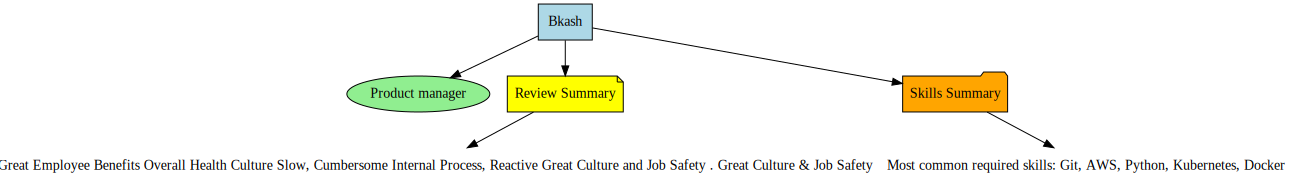

In [25]:
from graphviz import Digraph

def create_company_diagram(company_name, positions, review_summary, skills_summary):
    """Creates a directed graph visualization for a company's information."""
    dot = Digraph(comment=f'{company_name} Overview')

    # Add company node
    dot.node('Company', company_name, shape='box', style='filled', fillcolor='lightblue')

    # Add position nodes and connect to company
    position_nodes = {}
    for i, pos in enumerate(positions):
        pos_id = f'Position{i}'
        dot.node(pos_id, pos, shape='ellipse', style='filled', fillcolor='lightgreen')
        dot.edge('Company', pos_id)
        position_nodes[pos] = pos_id

    # Add review summary node and connect to company
    if review_summary and review_summary != "Not enough review text to generate a summary." and review_summary != "Could not generate summary.":
        dot.node('ReviewSummary', 'Review Summary', shape='note', style='filled', fillcolor='yellow')
        dot.edge('Company', 'ReviewSummary')
        # Add a node for the summary text itself
        dot.node('ReviewText', review_summary, shape='plaintext')
        dot.edge('ReviewSummary', 'ReviewText')


    # Add skills summary node and connect to company
    if skills_summary and skills_summary != "No skills data available for this company.":
        dot.node('SkillsSummary', 'Skills Summary', shape='folder', style='filled', fillcolor='orange')
        dot.edge('Company', 'SkillsSummary')
        # Add a node for the skills text itself
        dot.node('SkillsText', skills_summary, shape='plaintext')
        dot.edge('SkillsSummary', 'SkillsText')


    return dot

# Get the company name from the last execution
# Assuming 'company_name_input', 'unique_positions', 'review_summary', and 'skill_summary_text'
# variables are available from the previous execution of cell cc01da26 or 87bde0dd
if 'company_name_input' in locals() and company_name_input in df["Company Name"].unique():
    df_company_selected = df[df["Company Name"] == company_name_input]
    positions_for_diagram = df_company_selected["Position"].dropna().unique().tolist()

    # Check if a specific position was selected for detailed analysis
    if 'position' in locals() and position in positions_for_diagram:
         # If a position was selected, display details for that specific position
         positions_to_show = [position]
         # Use the review_summary and skill_summary_text from the specific position analysis
         company_review_summary = review_summary if 'review_summary' in locals() else "No review summary available."
         company_skills_summary = skill_summary_text if 'skill_summary_text' in locals() else "No skills summary available."
    else:
         # If only the company name was entered, display all positions
         positions_to_show = positions_for_diagram
         # Note: You might want to generate a company-wide summary and skill list here
         # For now, using placeholders or indicating not available if no specific position was analyzed last
         company_review_summary = "Run analysis for a specific position to see summary."
         company_skills_summary = "Run analysis for a specific position to see skills."

    # Create and render the diagram
    company_diagram = create_company_diagram(company_name_input, positions_to_show, company_review_summary, company_skills_summary)
    display(company_diagram)

elif 'company_name_input' in locals():
    print(f"Company '{company_name_input}' was not found in the dataset in the last run, or the cell with analysis was not run.")
else:
    print("Please run the analysis cell first to select a company and position.")

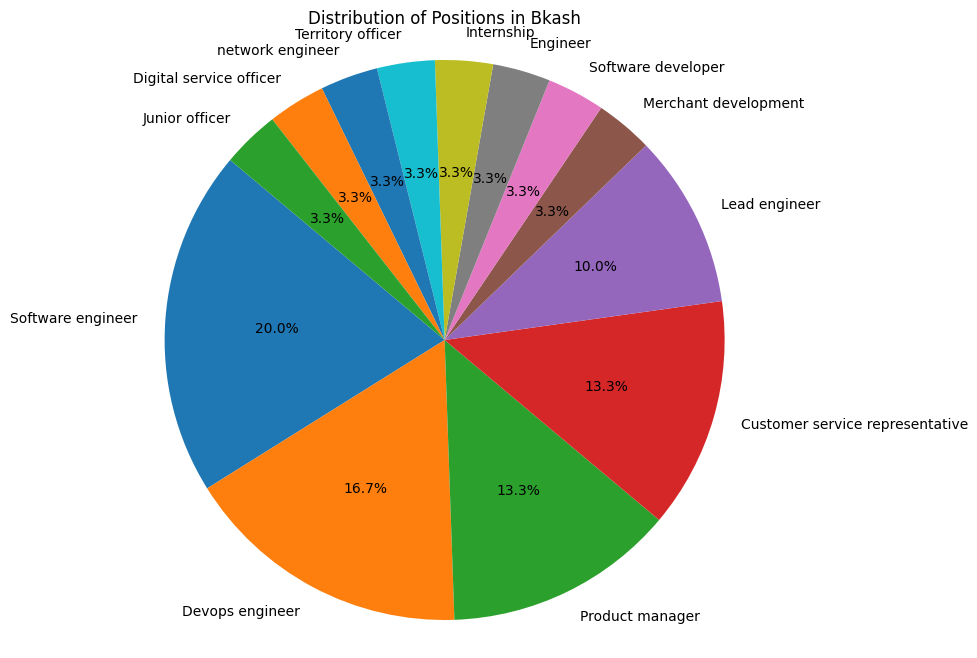

In [26]:
import matplotlib.pyplot as plt

# Check if a company has been selected in the previous cell
if 'df_company_selected' in locals() and not df_company_selected.empty:
    # Count the occurrences of each position within the selected company
    position_counts = df_company_selected['Position'].value_counts()

    if not position_counts.empty:
        # Create the pie chart
        plt.figure(figsize=(10, 8))
        plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution of Positions in {company_name_input}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print(f"No position data available to create a pie chart for '{company_name_input}'.")
else:
    print("Please run the analysis cell first to select a company.")

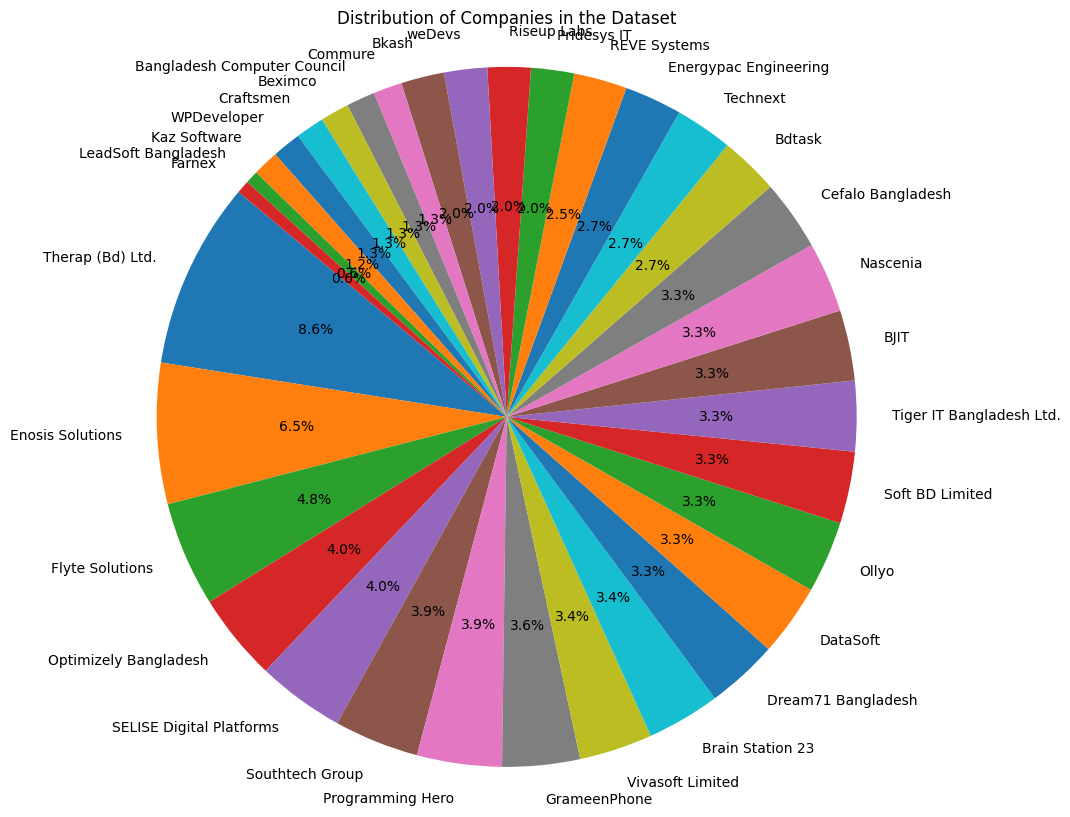

In [27]:
import matplotlib.pyplot as plt

# Count the occurrences of each company name in the entire dataset
company_counts = df['Company Name'].value_counts()

if not company_counts.empty:
    # Create the pie chart
    plt.figure(figsize=(12, 10))
    plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Companies in the Dataset')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("No company data available to create a pie chart.")

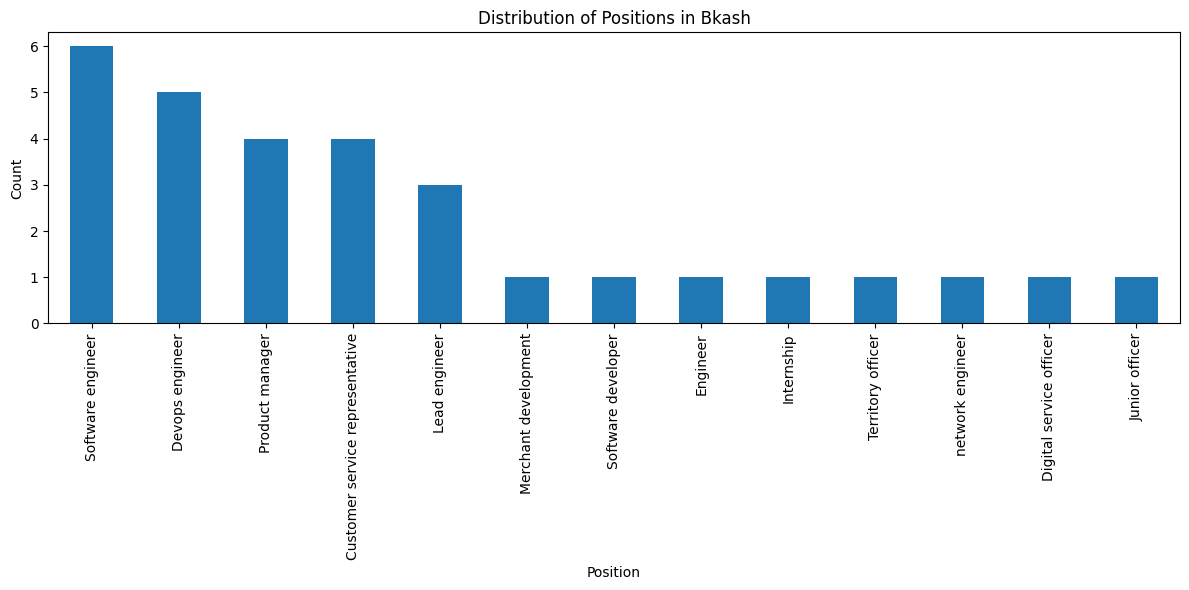

In [28]:
import matplotlib.pyplot as plt

# Check if a company has been selected in the previous cell
if 'df_company_selected' in locals() and not df_company_selected.empty:
    # Count the occurrences of each position within the selected company
    position_counts = df_company_selected['Position'].value_counts()

    if not position_counts.empty:
        # Create the histogram
        plt.figure(figsize=(12, 6))
        position_counts.plot(kind='bar')
        plt.title(f'Distribution of Positions in {company_name_input}')
        plt.xlabel('Position')
        plt.ylabel('Count')
        plt.xticks(rotation=90) # Rotate labels for better readability
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()
    else:
        print(f"No position data available to create a histogram for '{company_name_input}'.")
else:
    print("Please run the analysis cell first to select a company.")

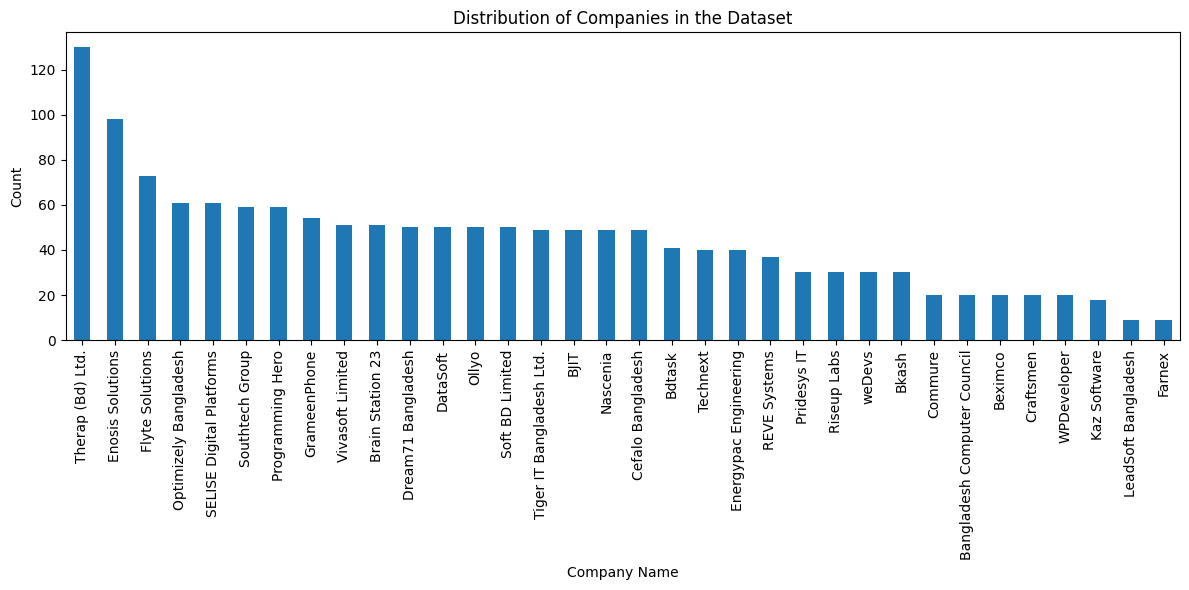

In [29]:
import matplotlib.pyplot as plt

# Count the occurrences of each company name in the entire dataset
company_counts = df['Company Name'].value_counts()

if not company_counts.empty:
    # Create the bar chart
    plt.figure(figsize=(12, 6))
    company_counts.plot(kind='bar')
    plt.title('Distribution of Companies in the Dataset')
    plt.xlabel('Company Name')
    plt.ylabel('Count')
    plt.xticks(rotation=90) # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
else:
    print("No company data available to create a bar chart.")

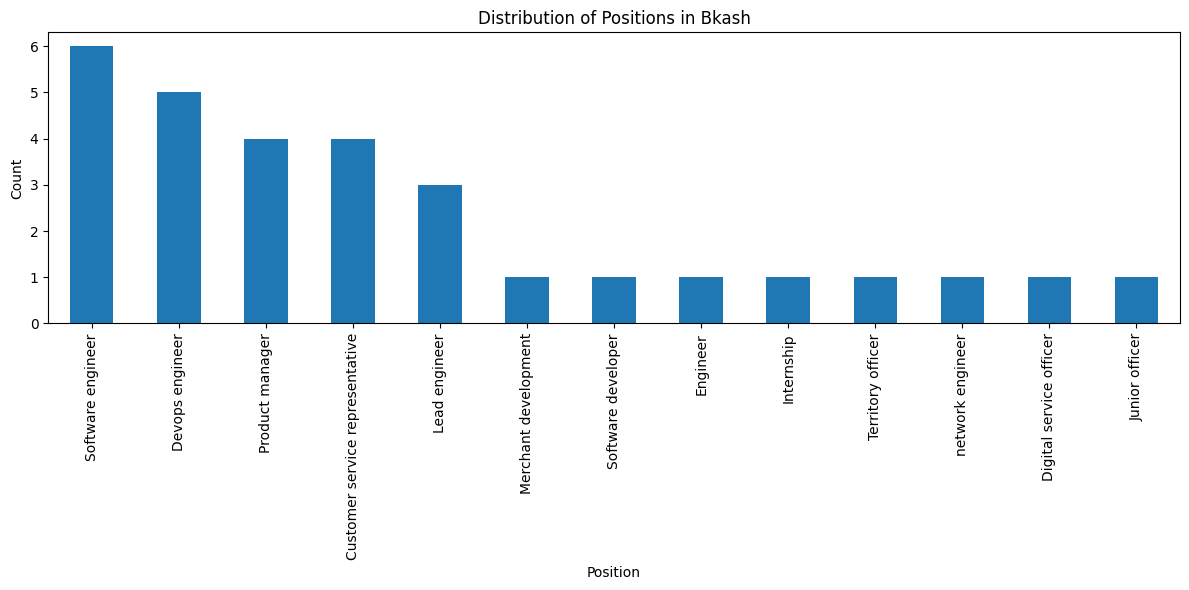

In [31]:
import matplotlib.pyplot as plt

# Check if a company has been selected in the previous cell
if 'df_company_selected' in locals() and not df_company_selected.empty:
    # Count the occurrences of each position within the selected company
    position_counts = df_company_selected['Position'].value_counts()

    if not position_counts.empty:
        # Create the histogram
        plt.figure(figsize=(12, 6))
        position_counts.plot(kind='bar')
        plt.title(f'Distribution of Positions in {company_name_input}')
        plt.xlabel('Position')
        plt.ylabel('Count')
        plt.xticks(rotation=90) # Rotate labels for better readability
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()
    else:
        print(f"No position data available to create a histogram for '{company_name_input}'.")
else:
    print("Please run the analysis cell first to select a company.")

# Task
Analyze the sentiment of company reviews in the 'Company Overview' column of the file "company_reviews.csv", identify the top 10 companies with the most positive reviews, and visualize the distribution of positive reviews among these top companies using a pie chart.

# **Sentiment analysis**


### Subtask:
Perform sentiment analysis on the 'Company Overview' column to determine the sentiment (positive, negative, or neutral) of each review.


**Reasoning**:
I need to perform sentiment analysis on the 'Company Overview' column. This involves importing the `pipeline` function, loading a sentiment analysis model, applying it to the relevant column, extracting the sentiment label, and storing it in a new column named 'Sentiment'. I will group these steps into a single code block.



In [32]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

# Apply the sentiment analysis model to the 'Company Overview' column and extract labels
df['Sentiment'] = df['Company Overview'].apply(lambda x: sentiment_analyzer(x)[0]['label'] if pd.notnull(x) else None)

# Display the first few rows with the new Sentiment column
display(df.head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


,Company Name,Position,Skills Required,Experience,Others,Work Type,Company Overview,Clean_Review,Sentiment
0,Tiger IT Bangladesh Ltd.,Software Engineer / Developer,"Java, Spring Boot, C++",0,NaN,Onsite,"Good Environment, good salary, Flexible",good environment good salary flexible,POSITIVE
1,Tiger IT Bangladesh Ltd.,Software Engineer / Developer,".NET, Python",1,NaN,Onsite,"Cannot mention regrading other team, nothing m...",mention regrading team nothing mentionable,NEGATIVE
2,Tiger IT Bangladesh Ltd.,Software Engineer / Developer,"OOP, DSA, RESTful APIs, SQL",2,NaN,Onsite,"The work environment,Salary n the lunch",work environmentsalary n lunch,NEGATIVE
3,Tiger IT Bangladesh Ltd.,Software Engineer / Developer,"Spring Boot, C++",2,NaN,Onsite,"Flexible work culture, good work-life balance,...",flexible work culture good worklife balance te...,POSITIVE
4,Tiger IT Bangladesh Ltd.,Software Engineer / Developer,"C++, OOP, DSA, Java",3,NaN,Onsite,Salary reviews are heavily delayed — often tak...,salary reviews heavily delayed often taking 2 ...,NEGATIVE


## Count positive reviews

### Subtask:
Count the number of positive reviews for each company.


**Reasoning**:
Filter the DataFrame for positive reviews and count them by company name.



In [33]:
positive_reviews_df = df[df['Sentiment'] == 'POSITIVE']
positive_review_counts = positive_reviews_df['Company Name'].value_counts()
display(positive_review_counts.head())

,count
Company Name,
Therap (Bd) Ltd.,72
GrameenPhone,51
Enosis Solutions,48
Flyte Solutions,44
Nascenia,44


## Identify top companies

### Subtask:
Identify the top 10 companies with the highest number of positive reviews.


**Reasoning**:
Select the top 10 companies with the most positive reviews from the positive review counts.



In [34]:
top_10_companies = positive_review_counts.head(10)
display(top_10_companies)

,count
Company Name,
Therap (Bd) Ltd.,72
GrameenPhone,51
Enosis Solutions,48
Flyte Solutions,44
Nascenia,44
Programming Hero,41
SELISE Digital Platforms,39
Ollyo,37
Optimizely Bangladesh,37


## Visualize top companies

### Subtask:
Create a pie chart showing the distribution of positive reviews among the top 10 companies.


**Reasoning**:
Create a pie chart to visualize the distribution of positive reviews among the top 10 companies.



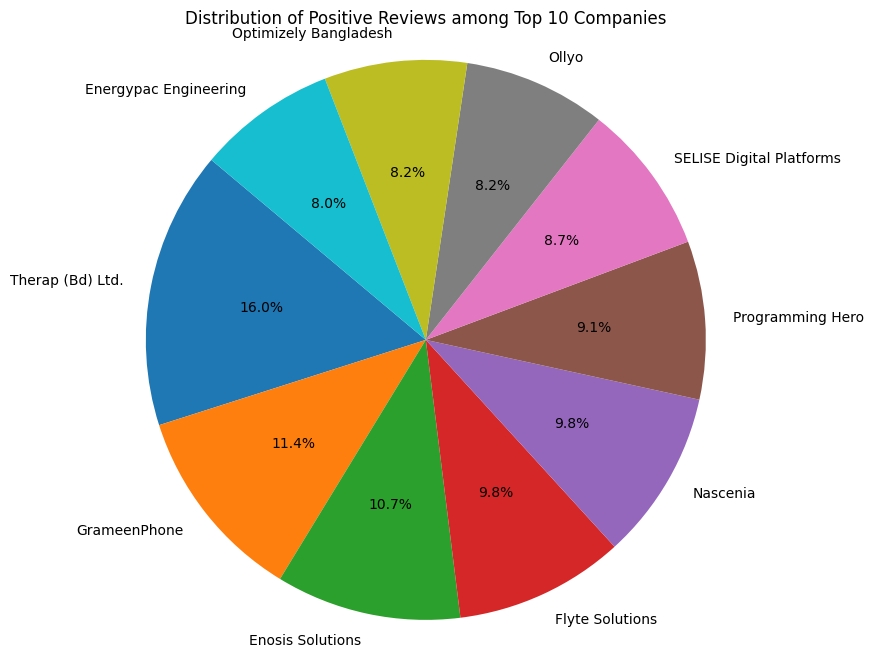

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(top_10_companies, labels=top_10_companies.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive Reviews among Top 10 Companies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Present results

### Subtask:
Display the list of the top companies and the pie chart.


**Reasoning**:
Print the heading and display the top 10 companies and the pie chart as requested by the subtask.



In [36]:
print("Top 10 Companies with the Most Positive Reviews:")
display(top_10_companies)

# The pie chart is generated and displayed by the previous cell's code.
# No additional code is needed here to display the plot.

Top 10 Companies with the Most Positive Reviews:


,count
Company Name,
Therap (Bd) Ltd.,72
GrameenPhone,51
Enosis Solutions,48
Flyte Solutions,44
Nascenia,44
Programming Hero,41
SELISE Digital Platforms,39
Ollyo,37
Optimizely Bangladesh,37


## Summary:

### Data Analysis Key Findings

*   Sentiment analysis was performed on the 'Company Overview' column, classifying reviews as 'POSITIVE' or 'NEGATIVE'.
*   "Therap (Bd) Ltd." had the highest number of positive reviews (72).
*   The top 10 companies with the most positive reviews were identified.

### Insights or Next Steps

*   The analysis highlights companies with strong positive sentiment in their reviews, which can be valuable for market positioning or identifying best practices.
*   Further analysis could investigate the content of positive and negative reviews to understand specific reasons for sentiment.


In [37]:
# Count the number of non-missing reviews for each company
review_counts_by_company = df.groupby('Company Name')['Company Overview'].count().reset_index()

# Rename the columns for clarity
review_counts_by_company.columns = ['Company Name', 'Number of Reviews']

# Display the table
print("Number of Reviews Available per Company:")
display(review_counts_by_company)

Number of Reviews Available per Company:


,Company Name,Number of Reviews
0,BJIT,49
1,Bangladesh Computer Council,20
2,Bdtask,41
3,Beximco,20
4,Bkash,30
5,Brain Station 23,51
6,Cefalo Bangladesh,49
7,Commure,20
8,Craftsmen,20
9,DataSoft,50


In [38]:
# Analyze sentiment of the first 20 reviews for each company

# Group by company and take the first 20 reviews
df_first_20_reviews = df.groupby('Company Name').head(20)

# Apply sentiment analysis to these reviews
sentiment_analyzer = pipeline("sentiment-analysis")
df_first_20_reviews['Sentiment_20'] = df_first_20_reviews['Company Overview'].apply(
    lambda x: sentiment_analyzer(x)[0]['label'] if pd.notnull(x) else None
)

# Count positive reviews for each company based on the first 20 reviews
positive_reviews_20_counts = df_first_20_reviews[df_first_20_reviews['Sentiment_20'] == 'POSITIVE']['Company Name'].value_counts().reset_index()
positive_reviews_20_counts.columns = ['Company Name', 'Positive Review Count (First 20 Reviews)']

# Sort the companies by the number of positive reviews
positive_reviews_20_counts = positive_reviews_20_counts.sort_values(by='Positive Review Count (First 20 Reviews)', ascending=False)

# Display the table
print("Companies with the Most Positive Reviews (Based on First 20 Reviews):")
display(positive_reviews_20_counts)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Companies with the Most Positive Reviews (Based on First 20 Reviews):


/tmp/ipython-input-1574382982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_20_reviews['Sentiment_20'] = df_first_20_reviews['Company Overview'].apply(


,Company Name,Positive Review Count (First 20 Reviews)
0,Craftsmen,20
1,Bangladesh Computer Council,20
2,GrameenPhone,19
3,Bkash,19
4,Energypac Engineering,17
5,Ollyo,17
6,Nascenia,17
7,Riseup Labs,17
8,WPDeveloper,16
9,Kaz Software,16


In [39]:
from collections import Counter

# Analyze the 'Skills Required' column
# Split the skills and count their occurrences
all_skills = df['Skills Required'].dropna().str.split(',').explode()
all_skills = all_skills.str.strip()
skill_counts = Counter(all_skills)

# Display the most common skills
print("Most Common Required Skills Across All Companies and Positions:")
for skill, count in skill_counts.most_common(10):
    print(f"- {skill}: {count}")

print("\n" + "="*50 + "\n")

# Analyze the 'Position' column
position_counts = df['Position'].value_counts()

# Display the most common positions
print("Most Common Positions Across All Companies:")
for position, count in position_counts.head(10).items():
    print(f"- {position}: {count}")

Most Common Required Skills Across All Companies and Positions:
- Git: 166
- Python: 146
- Java: 112
- JavaScript: 99
- PostgreSQL: 75
- MySQL: 74
- MongoDB: 74
- Docker: 69
- Django: 64
- Spring Boot: 63


Most Common Positions Across All Companies:
- Software engineer: 195
- Business analyst: 35
- Associate software engineer: 35
- Associate Software Engineer: 31
- Software Engineer: 30
- Software quality assurance engineer: 27
- Web developer: 25
- Associate training and content specialist: 22
- Software architect: 21
- QA Engineer: 20


In [40]:
company_name = "Therap (Bd) Ltd."

# Filter the DataFrame for the specified company
df_therap = df[df["Company Name"] == company_name]

# Get the unique positions for the company
unique_positions_therap = df_therap["Position"].dropna().unique().tolist()

if not unique_positions_therap:
    print(f"No position data found for '{company_name}'.")
else:
    print(f"Positions available for '{company_name}':")
    for i, position in enumerate(unique_positions_therap):
        print(f"{i + 1}. {position}")

Positions available for 'Therap (Bd) Ltd.':
1. Software engineer
2. Machine learning engineer
3. Associate training and content specialist
4. Associate software engineer
5. Software quality assurance engineer
6. Motion graphics designer
7. Database engineer
8. Associate software developer
9. Training and content specialist
10. Quality assurance engineer


In [41]:
# Count the number of reviews for each position in the filtered DataFrame
position_review_counts = df_therap["Position"].value_counts()

if position_review_counts.empty:
    print(f"No review data found for positions in '{company_name}'.")
else:
    print(f"\nNumber of Reviews per Position for '{company_name}':")
    for position, count in position_review_counts.items():
        print(f"- {position}: {count} reviews")


Number of Reviews per Position for 'Therap (Bd) Ltd.':
- Associate training and content specialist: 22 reviews
- Training and content specialist: 15 reviews
- Software quality assurance engineer: 14 reviews
- Database engineer: 13 reviews
- Motion graphics designer: 12 reviews
- Associate software engineer: 12 reviews
- Machine learning engineer: 11 reviews
- Software engineer: 11 reviews
- Associate software developer: 10 reviews
- Quality assurance engineer: 10 reviews


In [42]:
# Count the number of reviews for each position in the filtered DataFrame
position_review_counts = df_therap["Position"].value_counts()

if position_review_counts.empty:
    print(f"No review data found for positions in '{company_name}'.")
else:
    print(f"\nNumber of Reviews per Position for '{company_name}':")
    # Convert the Series to a DataFrame for better display
    position_review_counts_df = position_review_counts.reset_index()
    position_review_counts_df.columns = ['Position', 'Number of Reviews']
    display(position_review_counts_df)


Number of Reviews per Position for 'Therap (Bd) Ltd.':


,Position,Number of Reviews
0,Associate training and content specialist,22
1,Training and content specialist,15
2,Software quality assurance engineer,14
3,Database engineer,13
4,Motion graphics designer,12
5,Associate software engineer,12
6,Machine learning engineer,11
7,Software engineer,11
8,Associate software developer,10
9,Quality assurance engineer,10
